### 선형 회귀

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
df = pd.read_csv("../../data/regression/compactiv.csv")
X = df.drop('y', axis = 1)
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 2022)

In [15]:
from sklearn.linear_model import *
LR = LinearRegression().fit(X_train, y_train)
ridge = Ridge().fit(X_train, y_train)
lasso = Lasso().fit(X_train, y_train)
EN = ElasticNet().fit(X_train, y_train)

In [16]:
from sklearn.metrics import mean_absolute_error as MAE
def regression_model_test(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mae = MAE(y_test, y_pred)
    return mae

In [17]:
LR_mae = regression_model_test(LR, X_test, y_test)
ridge_mae = regression_model_test(ridge, X_test, y_test)
lasso_mae = regression_model_test(lasso, X_test, y_test)
EN_mae = regression_model_test(EN, X_test, y_test)
print(LR_mae, ridge_mae, lasso_mae, EN_mae)

6.0468771931780605 6.04686638162807 6.099519755350322 6.074987094435656


In [20]:
Lasso1 = Lasso(alpha = 0.1, random_state = 2022).fit(X_train, y_train)
Lasso2 = Lasso(alpha = 1, random_state = 2022).fit(X_train, y_train)
Lasso3 = Lasso(alpha = 10, random_state = 2022).fit(X_train, y_train)

Lasso1_mae = regression_model_test(Lasso1, X_test, y_test)
Lasso2_mae = regression_model_test(Lasso2, X_test, y_test)
Lasso3_mae = regression_model_test(Lasso3, X_test, y_test)
print(Lasso1_mae, Lasso2_mae, Lasso3_mae)

6.044036480564693 6.099519755350322 6.2038739785793755


In [22]:
Lasso4 = Lasso(alpha = 0.05, random_state = 2022).fit(X_train, y_train)
Lasso5 = Lasso(alpha = 5, random_state = 2022).fit(X_train, y_train)

Lasso4_mae = regression_model_test(Lasso4, X_test, y_test)
Lasso5_mae = regression_model_test(Lasso5, X_test, y_test)
print(Lasso4_mae, Lasso5_mae)

6.045073780285435 6.1814548400964116


### 로지스틱 회귀

In [35]:
df = pd.read_csv("../../data/classification/ecoli1.csv")
X = df.drop('y', axis = 1)
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 2022)

In [36]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(X_train, y_train)

In [42]:
from sklearn.metrics import f1_score 
y_pred = model.predict(X_test)
f1 = f1_score(y_test, y_pred)
print(f1)

0.7096774193548387


In [52]:
y_prob = model.predict_proba(X_test)
print(model.classes_)

[0 1]


In [54]:
from sklearn.metrics import precision_score, recall_score
def precision_and_recall_accto_threshold(y_prob, y_test, threshold):
    y_prob_pred = (y_prob[:, 1] > threshold).astype(int)
    precision = precision_score(y_test, y_prob_pred)
    recall = recall_score(y_test, y_prob_pred)
    return precision, recall

In [62]:
import numpy as np
precision_list = []
recall_list = []
threshold_list = np.arange(0, 1, 0.01)
for threshold in threshold_list:
    precision, recall = precision_and_recall_accto_threshold(y_prob, y_test, threshold)
    precision_list.append(precision)
    recall_list.append(recall)

C:\Users\Gilseung\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Gilseung\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Gilseung\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Gilseung\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning

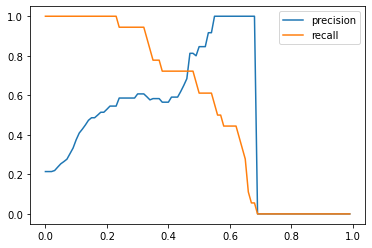

In [63]:
from matplotlib import pyplot as plt
plt.plot(threshold_list, precision_list, label = "precision")
plt.plot(threshold_list, recall_list, label = "recall")
plt.legend()
plt.show()

### 선형성을 고려한 특징 공학

#### 선형 모델의 한계

Text(0, 0.5, 'y')

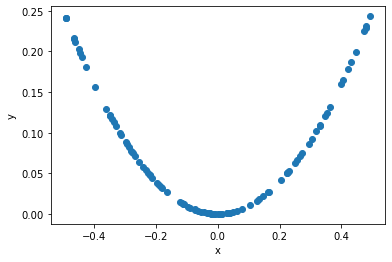

In [66]:
x = np.random.random(100) - 0.5
y = x ** 2
plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")

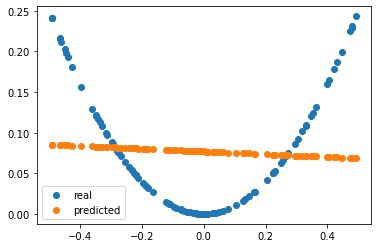

In [70]:
model = LinearRegression().fit(x.reshape(-1, 1), y)
y_pred = model.predict(x.reshape(-1, 1))
plt.scatter(x, y, label = "real")
plt.scatter(x, y_pred, label = "predicted")
plt.legend()
plt.show()

#### 특징 변환 및 생성

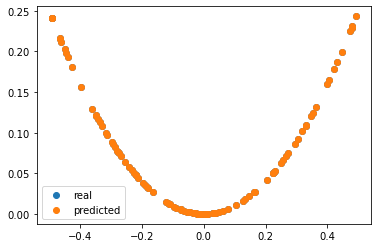

In [75]:
new_X = pd.DataFrame({"x":x, "x_squared":x**2})
model = LinearRegression().fit(new_X, y)
y_pred = model.predict(new_X)
plt.scatter(x, y, label = "real")
plt.scatter(x, y_pred, label = "predicted")
plt.legend()
plt.show()